<a href="https://colab.research.google.com/github/valesierrai/Introduccion-a-la-Inteligencia-de-Negocios/blob/main/Gesti%C3%B3n_y_Manipulaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Importamos Librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Mis Canciones V2

##1. Cargamos la Base de Datos

In [ ]:
datos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/IB/MisCancionesV2.xls',
                      sheet_name= None, header= 0 )

In [ ]:
#Nos muestra el nombre de cada tabla (Retorna las claves del diccionario)
datos.keys()

dict_keys(['Artistas', 'Canciones', 'Álbumes', 'Géneros'])

In [ ]:
#Accedemos a la información de 'Canciones'
datos['Canciones']

,identificador,título,duración,género,idioma,artista principal,álbum original
0,10001,La tierra del olvido,00:04:25,1,español,50001,900001.0
1,10002,Ojos así,00:03:57,3,español,50003,900002.0
2,10003,Mi gente,00:03:05,4,español,50005,NaN
3,10004,Ambiente,00:04:08,4,español,50005,900004.0
4,10005,Cali pachanguero,00:04:51,2,español,50002,900005.0
5,10006,La creciente,00:03:04,1,español,50004,900006.0
6,10007,Sueños de conquista,00:04:02,1,español,50004,900008.0
7,10009,Carito,00:03:39,3,español,50001,900009.0
8,10011,Una aventura,00:05:16,2,español,50002,900011.0
9,10012,Ginza,00:04:39,4,español,50005,NaN


##2. Se empiezan a ejecutar sqlite

In [ ]:
#1. Se crea/lee la base de datos
conexion = sqlite3.connect('MusicaColombiana.db')
cursor = conexion.cursor()

In [ ]:
#Dado que se tienen varias tablas, usaremos un ciclo para pasar la información desde el diccionario hasta la base de datos creada
for hoja, datos in datos.items():
  datos.to_sql(hoja, conexion, if_exists = 'replace', index = False)

In [ ]:
#Confirmamos los cambios ejecutados en la base de datos
conexion.commit()

In [ ]:
#Creamos la consultas (formato de texto), en SQL
#Para visualizar los nombres de todas las tablas que tiene la base de datos
consulta = '''SELECT name
           FROM sqlite_master
           WHERE type = 'table' '''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
print(cursor.fetchall()) #fetchall: Se trae toda la información de la base de datos para visualizar

[('Artistas',), ('Canciones',), ('Álbumes',), ('Géneros',)]


*()=tuplas

*[]=listas

In [ ]:
#Para visualizar toda la información de la tabla 'Artistas'
consulta = '''SELECT *
           FROM Artistas'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
artista = cursor.fetchall()
for fila in artista:
  print(fila)

(50001, 'Carlos Vives', 1986, None, 'Solista', 1)
(50002, 'Niche', 1979, None, 'Grupo', 2)
(50003, 'Shakira', 1990, None, 'Solista', 3)
(50004, 'Binomio de Oro de América', 1976, None, 'Grupo', 1)
(50005, 'J Balvin', 2006, None, 'Solista', 4)


In [ ]:
#Para convertir el resultado de la consulta en un DataFrame de pandas
columnas = [descripcion[0] for descripcion in cursor.description]
df_artistas = pd.DataFrame(artista, columns = columnas)
df_artistas

,identificador,nombre,año de lanzamiento,año de retiro,tipo,género principal
0,50001,Carlos Vives,1986,None,Solista,1
1,50002,Niche,1979,None,Grupo,2
2,50003,Shakira,1990,None,Solista,3
3,50004,Binomio de Oro de América,1976,None,Grupo,1
4,50005,J Balvin,2006,None,Solista,4


In [ ]:
#Para mirar la información de TODAS LAS COLUMNAS
consulta = '''PRAGMA table_info(Artistas)'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

(0, 'identificador', 'INTEGER', 0, None, 0)
(1, 'nombre', 'TEXT', 0, None, 0)
(2, 'año de lanzamiento', 'INTEGER', 0, None, 0)
(3, 'año de retiro', 'REAL', 0, None, 0)
(4, 'tipo', 'TEXT', 0, None, 0)
(5, 'género principal', 'INTEGER', 0, None, 0)


###2.1. Ejemplos de Consulta

1. Selecciones el título, la fecha, de lanzamiento y el sello discográfico, de la tabla Álbumes, y ordenar el resultado por título de manera ascendente

In [ ]:
consulta = '''SELECT título AS álbum,
             "fecha de lanzamiento" as lanzamiento,
             "sello discográfico" as sello
           FROM Álbumes
           ORDER BY título ASC'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

('Cielo de tambores', '1990-12-20 00:00:00', 'Codiscos')
('Déjame entrar', '2001-11-06 00:00:00', 'EMI Latin')
('El binomio de oro', '1976-11-03 00:00:00', 'Codiscos')
('La tierra del olvido', '1995-07-25 00:00:00', 'EMI Latin')
('No hay quinto malo', None, 'Internacional Records')
('Por lo alto', '1976-11-02 00:00:00', 'Codiscos')
('Vibras', '2018-05-25 00:00:00', 'Universal')
('¿Dónde están los ladrones?', '1998-09-29 00:00:00', 'Sony Music')


In [ ]:
columnas = [descripcion[0] for descripcion in cursor.description]
df_albumes = pd.DataFrame(resultados, columns = columnas)
df_albumes

,álbum,lanzamiento,sello
0,Cielo de tambores,1990-12-20 00:00:00,Codiscos
1,Déjame entrar,2001-11-06 00:00:00,EMI Latin
2,El binomio de oro,1976-11-03 00:00:00,Codiscos
3,La tierra del olvido,1995-07-25 00:00:00,EMI Latin
4,No hay quinto malo,None,Internacional Records
5,Por lo alto,1976-11-02 00:00:00,Codiscos
6,Vibras,2018-05-25 00:00:00,Universal
7,¿Dónde están los ladrones?,1998-09-29 00:00:00,Sony Music


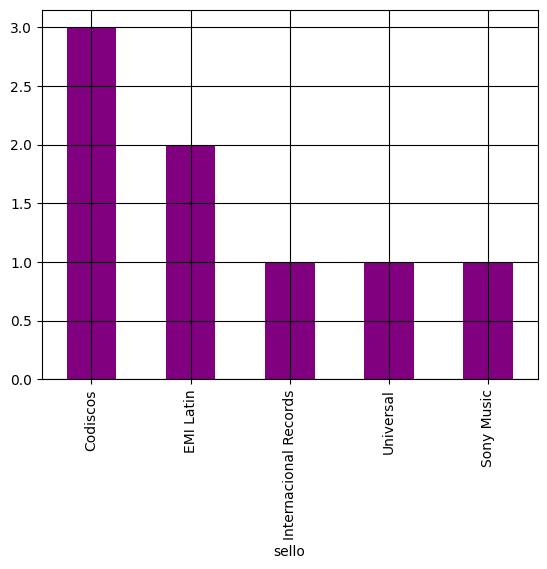

In [ ]:
#Generamos un gráfico para conocer la distribución de los sellos discográficos
frecuencias = df_albumes['sello'].value_counts()
frecuencias.plot(kind = 'bar', color = 'purple');
plt.grid(color = "black")

In [ ]:
#Cerramos conexión con la base de datos
conexion.close()

# Mis Canciones V3

In [ ]:
#Creamos la conexión a la base de datos, si existe, en caso contrario se genera la base de datos
conexion = sqlite3.connect('MisCancionesV3.db')
cursor = conexion.cursor()

In [ ]:
#Abrimos el archivo de SQL para ejecutar las consultas
with open('/content/drive/MyDrive/Colab Notebooks/IB/Creación MisCanciones V3.sql', 'r') as archivo:
  sql_script = archivo.read()

#Ejecutamos las consultas
cursor.executescript(sql_script)

#Confirmamos los cambios
conexion.commit()

In [ ]:
#Visualizamos las tablas de la nueva base de datos
consulta = '''SELECT name
           FROM sqlite_master
           WHERE type = 'table' '''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
print(cursor.fetchall())

[('Géneros',), ('Álbumes',), ('Usuarios',), ('Intérpretes',), ('Canciones',), ('Calificaciones',), ('Reproducciones',), ('ListasReproducción',), ('CancionesLista',)]


In [ ]:
#Nombre completo y fechas de registro de todos los usuarios
consulta = '''SELECT nombres||' '||apellidos,
           "fechaRegistro"
           FROM Usuarios;'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

('Alexander Buenahora', '01/01/2020')
('Ernesto Gonzalez', '20/12/2019')
('René Descartes', '13/07/2021')
('Fatme Issa', '30/01/2021')
('Baruch  Spinoza', '13/06/2020')
('Marie Curie ', '12/05/2018')
('Ana Frank', '24/02/2017')
('Piedad Bonnett', '17/06/2020')
('Jean-Jacques Rousseau', '12/09/2020')
('Mario Bunge', '08/11/2020')


In [ ]:
#Cambio de formato para que las diversas funciones de SQLite que operan sobre las fechas pueda funcionar, vamos a cambiar el formato original de las columnas
#de fecha en la tabla de usuarios (d/m/y -> y-m-d). Para ello usamos la función UPDATE

consulta = '''UPDATE Usuarios
           SET fechaRegistro = substr("fechaRegistro", 7, 4) || '-' || substr("fechaRegistro", 4, 2) || '-' || substr("fechaRegistro", 1, 2)'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Confirmamos los cambios
conexion.commit()

In [ ]:
#Revisamos
cursor.execute('SELECT * FROM Usuarios;''')
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

(1, 'alex@gmail.com', '81dc9bdb52d04dc20036dbd8313ed055', 'Alexander', 'Buenahora', 'M', '27/08/1988', 'Colombia', 'España', 'Español', '2020-01-01')
(2, 'ernesto@hotmail.com', '81b073de9370ea873f548e31b8adc081', 'Ernesto', 'Gonzalez', 'M', '23/03/1980', 'Venezuela', 'Colombia', 'Español', '2019-12-20')
(3, 'rene.metodo@gmail.com', 'def7924e3199be5e18060bb3e1d547a7', 'René', 'Descartes', 'F', '01/01/2000', 'Francia', 'Francia', 'Francés', '2021-07-13')
(4, 'fatima@yahoo.com', '6562c5c1f33db6e05a082a88cddab5ea', 'Fatme', 'Issa', 'F', '11/07/1976', 'Ecuador', 'Ecuador', 'Español', '2021-01-30')
(5, 'panteismo@gmail.com', '674f3c2c1a8a6f90461e8a66fb5550ba', 'Baruch ', 'Spinoza', 'M', '06/06/1970', 'Holanda', 'Portugal', 'Holandés', '2020-06-13')
(6, 'marie.curie@gmail.com', '46d045ff5190f6ea93739da6c0aa19bc', 'Marie', 'Curie ', 'F', '06/09/1992', 'Francia', 'Venezuela', 'Francés', '2018-05-12')
(7, 'ana.frank@hotmail.com', 'cdaeb1282d614772beb1e74c192bebda', 'Ana', 'Frank', 'F', '22/06/19

In [ ]:
#Realizamos la misma operación sobre la columna fechaNacimiento
consulta = '''UPDATE Usuarios
           SET fechaNacimiento = substr("fechaNacimiento", 7, 4) || '-' || substr("fechaNacimiento", 4, 2) || '-' || substr("fechaNacimiento", 1, 2)'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Confirmamos los cambios
conexion.commit()

In [ ]:
#Revisamos
cursor.execute('SELECT * FROM Usuarios;''')
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

(1, 'alex@gmail.com', '81dc9bdb52d04dc20036dbd8313ed055', 'Alexander', 'Buenahora', 'M', '1988-08-27', 'Colombia', 'España', 'Español', '2020-01-01')
(2, 'ernesto@hotmail.com', '81b073de9370ea873f548e31b8adc081', 'Ernesto', 'Gonzalez', 'M', '1980-03-23', 'Venezuela', 'Colombia', 'Español', '2019-12-20')
(3, 'rene.metodo@gmail.com', 'def7924e3199be5e18060bb3e1d547a7', 'René', 'Descartes', 'F', '2000-01-01', 'Francia', 'Francia', 'Francés', '2021-07-13')
(4, 'fatima@yahoo.com', '6562c5c1f33db6e05a082a88cddab5ea', 'Fatme', 'Issa', 'F', '1976-07-11', 'Ecuador', 'Ecuador', 'Español', '2021-01-30')
(5, 'panteismo@gmail.com', '674f3c2c1a8a6f90461e8a66fb5550ba', 'Baruch ', 'Spinoza', 'M', '1970-06-06', 'Holanda', 'Portugal', 'Holandés', '2020-06-13')
(6, 'marie.curie@gmail.com', '46d045ff5190f6ea93739da6c0aa19bc', 'Marie', 'Curie ', 'F', '1992-09-06', 'Francia', 'Venezuela', 'Francés', '2018-05-12')
(7, 'ana.frank@hotmail.com', 'cdaeb1282d614772beb1e74c192bebda', 'Ana', 'Frank', 'F', '1998-06-

In [ ]:
#¿Cuál es el e-mail, sexo, país de residencia,
#edad actual y edad al momento de registrarse en la plataforma de Streaming?

consulta = '''SELECT email,
              sexo,
              paísResidencia,
              strftime('%Y', 'now') - strftime('%Y', fechaNacimiento) AS edadActual,
              strftime('%Y', fechaRegistro) - strftime('%Y', fechaNacimiento) AS edadRegistro
           FROM Usuarios;'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

('alex@gmail.com', 'M', 'España', 36, 32)
('ernesto@hotmail.com', 'M', 'Colombia', 44, 39)
('rene.metodo@gmail.com', 'F', 'Francia', 24, 21)
('fatima@yahoo.com', 'F', 'Ecuador', 48, 45)
('panteismo@gmail.com', 'M', 'Portugal', 54, 50)
('marie.curie@gmail.com', 'F', 'Venezuela', 32, 26)
('ana.frank@hotmail.com', 'F', 'Alemania', 26, 19)
('piedad.bonnett@gmail.com', 'F', 'Colombia', 73, 69)
('elcontratosocial@yahoo.com', 'M', 'Francia', 37, 33)
('laciencia.bunge@hotmail.com', 'M', 'Cánada', 105, 101)


In [ ]:
#consultar las columnas de la tabla Usuarios
consulta = '''PRAGMA table_info(Usuarios)'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

(0, 'idUsuario', 'INT', 1, None, 1)
(1, 'email', 'VARCHAR(254)', 1, None, 0)
(2, 'contraseña', 'VARCHAR(128)', 1, None, 0)
(3, 'nombres', 'VARCHAR(100)', 1, None, 0)
(4, 'apellidos', 'VARCHAR(100)', 1, None, 0)
(5, 'sexo', 'VARCHAR(30)', 1, None, 0)
(6, 'fechaNacimiento', 'DATE', 1, None, 0)
(7, 'paísNacimiento', 'VARCHAR(100)', 1, None, 0)
(8, 'paísResidencia', 'VARCHAR(100)', 1, None, 0)
(9, 'idioma', 'VARCHAR(30)', 1, None, 0)
(10, 'fechaRegistro', 'DATE', 1, None, 0)


In [ ]:
#¿Cuál es el nombre completo, el email, y el nombre de dominio del servicio de email de los usuarios que están en el rango de edad entre 20 y 39 años?

consulta = '''SELECT nombres||' '||apellidos AS nombreCompleto,
              email,
              substr(email, instr(email, '@') + 1) AS dominio,
              strftime('%Y', 'now') - strftime('%Y', fechaNacimiento) AS edad
           FROM Usuarios
           WHERE edad BETWEEN 20 AND 39;'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

('Alexander Buenahora', 'alex@gmail.com', 'gmail.com', 36)
('René Descartes', 'rene.metodo@gmail.com', 'gmail.com', 24)
('Marie Curie ', 'marie.curie@gmail.com', 'gmail.com', 32)
('Ana Frank', 'ana.frank@hotmail.com', 'hotmail.com', 26)
('Jean-Jacques Rousseau', 'elcontratosocial@yahoo.com', 'yahoo.com', 37)


##Funciones de Agregración

Son aquellas que se usan para resumir los datos

In [ ]:
#Cuántas canciones clasificadas en el género 4 se tienen almacenadas en la conexión
consulta = '''SELECT COUNT(*)
FROM Canciones
WHERE IdGénero = 4'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

(4,)


In [ ]:
#Cuántos álbumes tienen canciones almacenadas en la colección que estén clasificadas en el género 3 o en el género 6
consulta = '''SELECT COUNT(*)
FROM Canciones
WHERE IdGénero IN (3, 6)'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

(6,)


In [ ]:
#Cuánto tiempo tomaría reproducir de forma continua todos las canciones del álbum con id 15?
consulta = '''SELECT SUM(substr(duración, 1, 2)* 3600 + substr(duración, 4, 2)* 60 + substr(duración, 7,2))/3600,
(SUM(substr(duración, 1, 2) *3600 + substr(duración, 4, 2) * 60
+substr(duración, 7,2)) % 3600)/60,
SUM(substr(duración, 1, 2)* 3600 + substr(duración, 4,2 )*60
+ substr(duración,7, 2)) % 60 AS duraciónTotal
FROM Canciones
WHERE idÁlbumOriginal = 15'''

#Ejecutamos la consulta
cursor.execute(consulta)

#Mostramos los resultados
resultados = cursor.fetchall()
for resultado in resultados:
  print(resultado)

(0, 6, 32)


In [ ]:
#Cerramos la conexión
conexion.close()